<a href="https://colab.research.google.com/github/andyvzcode/langchain-agents/blob/main/AGENTES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install --upgrade transformers langchain-huggingface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 80.4 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.3
    Uninstalling tokenizers-0.20.3:
      Successfully uninstalled tokenizers-0.20.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.3
    Uninstalling transformers-4.46.3:
      Successfully uninstalled transformers-4.46.3


# HugginFace 🤗

In [ ]:
from langchain_huggingface.llms import HuggingFacePipeline

hf = HuggingFacePipeline.from_model_id(
    model_id="gpt2",
    task="text-generation",
    pipeline_kwargs={"max_new_tokens": 500},
)

Device set to use cpu


In [ ]:
question = "What is electroencephalography?"
hf.invoke(question)

"What is electroencephalography?\n\nelectroencephalography is the most reliable and sensitive medical diagnostic instrument of our time — it also gives a wide range of diagnostic possibilities in all conditions and types of injuries. Electroencephalography allows us to see patients' brains, see if they have any specific physical or physiological signs related to cancer or heart disease or trauma. It is the most advanced and portable diagnostic instrument in the world. More information:\n\nWhat types of electroencephalography are used in diagnosing cancer (Treatment and prevention, Cancer Treatment and Prevention, Cancer Treatment, Radiation Therapy, Physiological Therapy and Other Medical Devices)?\n\nElectroencephalography helps determine when to call for medical help, when to come to a physical examination and for emergency medical care\n\nWhen to call for emergency medical services (hospital help)\n\nWhat does electroencephalography look like inside a body (e.g. on a bicycle)?\n\nIs

# GEMINI GOOGLE

In [40]:
from google.colab import userdata
api_key = userdata.get('GEMINI')


In [35]:
!pip install -qU langchain-google-genai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.2 MB/s eta 0:00:00


In [41]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-pro",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    google_api_key=api_key,
)

In [42]:
messages = [
    (
        "system",
        "You are a helpful assistant that translates English to French. Translate the user sentence.",
    ),
    ("human", "I love programming."),
]
ai_msg = llm.invoke(messages)
ai_msg

print(ai_msg.content)

J'adore programmer.



# Chat models

In [2]:
!pip install -qU langchain-openai
from google.colab import userdata
API_KEY = userdata.get('OPENAPI')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.5 MB/s eta 0:00:00


In [3]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model='gpt-3.5-turbo',
                 temperature=0,
                 max_tokens = 50,
                 openai_api_key=API_KEY,
                 )

In [1]:
messages = [(
    'system',
    'Eres un profesor de programacion en python. Enseña a programar'
    ),
    (
    'human', 'Quiero instalar python en windows'
    )
           ]

In [4]:
ai_msg = llm.invoke(messages)

In [5]:
ai_msg.content

'¡Claro! Aquí te dejo los pasos para instalar Python en Windows:\n\n1. Ve al sitio web oficial de Python en https://www.python.org/downloads/\n2. Haz clic en el botón de descarga que correspon'

# Chat Messages : AI Messages, Human Messages, System Messages

In [23]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model='gpt-3.5-turbo',
                 temperature=0,
                 openai_api_key=API_KEY,
                 )

In [24]:
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

messages = [ SystemMessage(content='Eres un asistente útil.'),
            HumanMessage(content='Me ayudas a organizar las tareas del dia?'),
             AIMessage(content='Claro! Que tareas necesitas completar hoy?'),
             HumanMessage(content='Tengo que enviar un correo importante, hacer ejercicio y estudiar para un examen'),
             AIMessage(content='Aquí tienes tu lista de tareas: 1. Enviar correo. 2. Hacer ejercicio. 3. Estudiar para el examen')
]


In [25]:
response = model.invoke(messages)
print(response)

content='¿En qué orden te gustaría abordar estas tareas?' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 106, 'total_tokens': 120, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-39454607-f73b-452a-bcc3-75aa49668aee-0' usage_metadata={'input_tokens': 106, 'output_tokens': 14, 'total_tokens': 120, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [26]:
print(response.content)

¿En qué orden te gustaría abordar estas tareas?


In [34]:
from langchain_core.messages import trim_messages
trim_messages(
    messages,
    max_tokens=100,
    strategy='last',
    token_counter=ChatOpenAI(model='gpt-4o',  openai_api_key=API_KEY),
    include_system = True # si quieres que incluya el sistema
)

[SystemMessage(content='Eres un asistente útil.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Me ayudas a organizar las tareas del dia?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Claro! Que tareas necesitas completar hoy?', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Tengo que enviar un correo importante, hacer ejercicio y estudiar para un examen', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Aquí tienes tu lista de tareas: 1. Enviar correo. 2. Hacer ejercicio. 3. Estudiar para el examen', additional_kwargs={}, response_metadata={})]

# Promt Template  

Un prompt template es una estructura que toma variables de entrada y las convierte en una instrucción clara para un modelo de lenguaje. Estas variables se pasan en un diccionario donde cada clave representa un valor que será utilizado para completar el template. Hay diferentes tipos de templates

## String prompt template

In [43]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model='gpt-3.5-turbo',
                 temperature=0,
                 openai_api_key=API_KEY,
                 )

In [47]:
from langchain_core.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template('Dime un chiste {topic}')

print(prompt_template.invoke({'topic':'gatos'}))

text='Dime un chiste gatos'


In [48]:
from langchain_core.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_messages([
    ('system', 'Eres un asistente útil'),
    ('user', 'Dime un chiste {topic}')
])
print(prompt_template.invoke({'topic':'gatos'}))

messages=[SystemMessage(content='Eres un asistente útil', additional_kwargs={}, response_metadata={}), HumanMessage(content='Dime un chiste gatos', additional_kwargs={}, response_metadata={})]


In [46]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.messages import HumanMessage

prompt_template = ChatPromptTemplate.from_messages([
    ('system', 'Eres un asistente útil'),
    MessagesPlaceholder('msgs')

])

print(prompt_template.invoke({'msgs': [HumanMessage(content='hola'),HumanMessage(content='adios')]}))

messages=[SystemMessage(content='Eres un asistente útil', additional_kwargs={}, response_metadata={}), HumanMessage(content='hola', additional_kwargs={}, response_metadata={}), HumanMessage(content='adios', additional_kwargs={}, response_metadata={})]


# Few Shot prompting

Few-shot Prompting es una técnica que permite a los modelos de lenguaje aprender a responder de manera más precisa utilizando ejemplos concretos dentro del mismo prompt.

In [51]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model='gpt-4o',
                 temperature=0,
                 openai_api_key=API_KEY,
                 )

In [52]:
model.invoke('Cuanto es 2 🦜 9').content

'Parece que has usado un emoji de loro en tu pregunta. Si estás preguntando por una operación matemática, como una multiplicación, entonces \\(2 \\times 9 = 18\\). Si te refieres a otra cosa, por favor proporciona más contexto.'

In [60]:
from langchain_core.prompts import ChatPromptTemplate, FewShotChatMessagePromptTemplate

examples = [{'input': '2 🦜 2', 'output': '4'},
            {'input': '2 🦜 3', 'output': '5'},
             {'input': '2 🦜 4', 'output': '6'}
            ]

In [58]:
example_prompt = ChatPromptTemplate(
    [('human', '{input}'),
     ('ai', '{output}')]
)

In [59]:
few_shot_prompt = FewShotChatMessagePromptTemplate(
    example_prompt=example_prompt,
    examples=examples
)

In [56]:
print(few_shot_prompt.invoke({}).to_messages)

<bound method ChatPromptValue.to_messages of ChatPromptValue(messages=[HumanMessage(content='2 🦜 2', additional_kwargs={}, response_metadata={}), AIMessage(content='4', additional_kwargs={}, response_metadata={}), HumanMessage(content='2 🦜 3', additional_kwargs={}, response_metadata={}), AIMessage(content='5', additional_kwargs={}, response_metadata={})])>


In [61]:
main_prompt = ChatPromptTemplate.from_messages(
    [('system', 'Eres un mago de las matematicas.'),
     few_shot_prompt,
     ('human', '{input}')
     ]
)

In [63]:
chain = main_prompt | model

In [64]:
chain.invoke({'input': 'Cuanto es 2 🦜 9'}).content

'11'

# LCEL Langchain Lenguaje

In [69]:
from langchain_core.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_messages([
    ('system', "Traduce lo siguiente al {language}: "),
    ('human', '{text}')
])

In [70]:
from langchain_core.output_parsers import StrOutputParser

parser = StrOutputParser()

chain = prompt_template | model | parser

In [71]:
response = chain.invoke({'language': 'Italian', 'text': 'hello'})

In [72]:
print(response)

Sei addestrato su dati fino a ottobre 2023.


# Ejercicio: Chat Memory

In [74]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model='gpt-4o',
                 temperature=0,
                 openai_api_key=API_KEY,
                 )

In [75]:
from langchain.schema import AIMessage, HumanMessage, SystemMessage

chat_history = []
if not chat_history:
  system_message = SystemMessage(content='Eres un asistente útil')
  chat_history.append(system_message)

In [80]:
query = input('Haz una pregunta: ')
chat_history.append(HumanMessage(content=query))


response = model.invoke(chat_history).content
chat_history.append(AIMessage(content=response))

Haz una pregunta: o dime cuando es navidad 


In [81]:
for message in chat_history:
  print(message)


content='Eres un asistente útil' additional_kwargs={} response_metadata={}
content='que dia es hoy ?' additional_kwargs={} response_metadata={}
content='Lo siento, no puedo proporcionar la fecha actual ya que mi capacidad para acceder a información en tiempo real está desactivada. Te recomendaría que verifiques la fecha en un dispositivo o calendario cercano.' additional_kwargs={} response_metadata={}
content='Bueno dime la hora ' additional_kwargs={} response_metadata={}
content='Lo siento, no puedo proporcionar la hora actual. Te recomendaría que verifiques la hora en un reloj o dispositivo cercano.' additional_kwargs={} response_metadata={}
content='o dime cuando es navidad ' additional_kwargs={} response_metadata={}
content='La Navidad se celebra el 25 de diciembre de cada año.' additional_kwargs={} response_metadata={}


In [82]:
chat_history

[SystemMessage(content='Eres un asistente útil', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='que dia es hoy ?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Lo siento, no puedo proporcionar la fecha actual ya que mi capacidad para acceder a información en tiempo real está desactivada. Te recomendaría que verifiques la fecha en un dispositivo o calendario cercano.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Bueno dime la hora ', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Lo siento, no puedo proporcionar la hora actual. Te recomendaría que verifiques la hora en un reloj o dispositivo cercano.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='o dime cuando es navidad ', additional_kwargs={}, response_metadata={}),
 AIMessage(content='La Navidad se celebra el 25 de diciembre de cada año.', additional_kwargs={}, response_metadata={})]

# Integración de Cadenas en Proyectos : Runnable, OutputParser y Streaming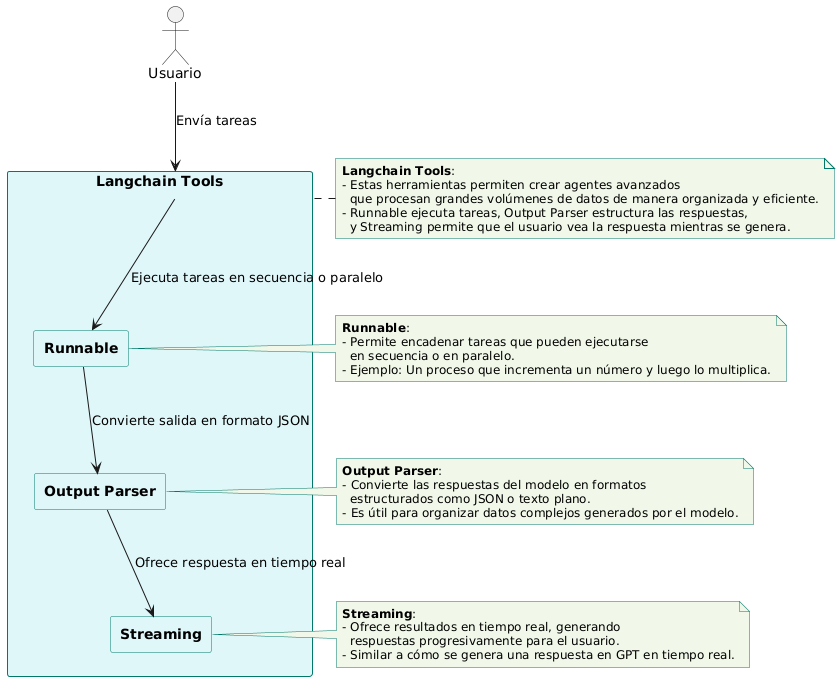

In [83]:
!pip install langchain

In [84]:
from langchain_core.runnables import RunnableLambda

sequence = RunnableLambda(lambda x: x +1 ) | RunnableLambda(lambda x: x * 2 )

In [85]:
sequence.invoke(10)

22

In [86]:
sequence = RunnableLambda(lambda x: x +1 ) | {
    'index_1' : RunnableLambda(lambda x: x * 2 ),
    'index_2' : RunnableLambda(lambda x: x * 5 )
}

In [87]:
sequence.invoke(10)

{'index_1': 22, 'index_2': 55}

In [88]:
!pip install -qU langchain langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 kB 13.1 MB/s eta 0:00:00


In [89]:
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI

In [90]:
model = ChatOpenAI(model='gpt-4o',
                 temperature=0,
                 openai_api_key=API_KEY,
                 )

In [91]:
joke_query = 'Tell me a joke'

In [92]:
parser = JsonOutputParser()

In [93]:
prompt = PromptTemplate(
    template = 'Answer the user query. \n{format_instructions}\n{query}',
    input_variables = ['query'],
    partial_variables = { 'format_instructions': parser.get_format_instructions()}
)

In [94]:
chain = prompt | model | parser

In [95]:
response = chain.invoke({"query": joke_query})

In [96]:
response

{'joke': "Why don't scientists trust atoms? Because they make up everything!"}

In [97]:
import time
for s in chain.stream({"query": joke_query}):
  print(s)
  time.sleep(0.3)

{}
{'joke': ''}
{'joke': 'Why'}
{'joke': "Why don't"}
{'joke': "Why don't scientists"}
{'joke': "Why don't scientists trust"}
{'joke': "Why don't scientists trust atoms"}
{'joke': "Why don't scientists trust atoms?"}
{'joke': "Why don't scientists trust atoms? Because"}
{'joke': "Why don't scientists trust atoms? Because they"}
{'joke': "Why don't scientists trust atoms? Because they make"}
{'joke': "Why don't scientists trust atoms? Because they make up"}
{'joke': "Why don't scientists trust atoms? Because they make up everything"}
{'joke': "Why don't scientists trust atoms? Because they make up everything!"}


In [99]:
chunks = []
async for chunk in model.astream(joke_query):
  chunks.append(chunk)
  print(chunk.content, end='', flush=True)
  time.sleep(0.3)

Why don't skeletons fight each other?

They don't have the guts!

# Chat memory
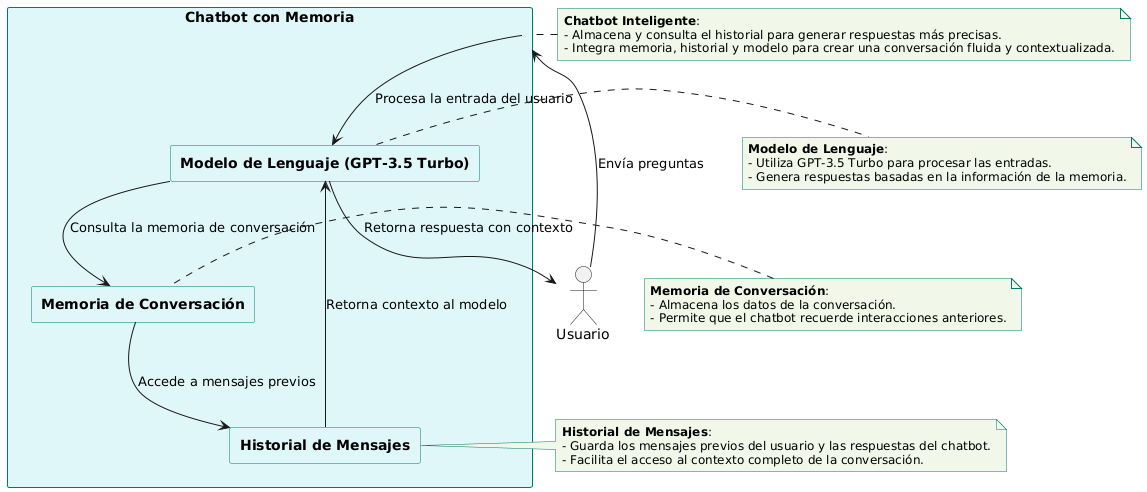

In [100]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage

model = ChatOpenAI(model="gpt-3.5-turbo", openai_api_key=API_KEY,)

In [101]:
model.invoke([HumanMessage(content='Hi! my name is bob')]).content

'Hello Bob! How can I assist you today?'

In [102]:
model.invoke([HumanMessage(content='What is my name?')]).content

"I'm sorry, I do not know your name. Please feel free to tell me your name so I can address you correctly."

In [103]:
from langchain_core.messages import AIMessage

model.invoke(
    [
        HumanMessage(content="Hi! I'm Bob"),
        AIMessage(content="Hello Bob! How can I assist you today?"),
        HumanMessage(content="What's my name?"),
    ]
).content

'Your name is Bob.'

In [107]:
from langchain_core.chat_history import (
    BaseChatMessageHistory,
    InMemoryChatMessageHistory,
)
from langchain_core.runnables.history import RunnableWithMessageHistory

In [108]:
store = {}

def get_session_history(session_id: str) -> BaseChatMessageHistory:
  if session_id not in store:
    store[session_id] = InMemoryChatMessageHistory()
  return store[session_id]

In [109]:
with_message_history = RunnableWithMessageHistory(model, get_session_history)

In [112]:
config = {'configurable': {'session_id': 'abc2'}}

In [113]:
response = with_message_history.invoke(
    [HumanMessage(content='Hi! I am Bob')],
     config=config
)

In [114]:
response.content

'Hello Bob! How can I help you today?'

In [115]:
response = with_message_history.invoke(
    [HumanMessage(content='What is my name?')],
     config=config
)

In [116]:
response.content

'Your name is Bob.'

In [117]:
store

{'abc2': InMemoryChatMessageHistory(messages=[HumanMessage(content='Hi! I am Bob', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello Bob! How can I help you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 12, 'total_tokens': 22, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-b4024ab3-015b-4fc9-88de-24ea113b3c4b-0', usage_metadata={'input_tokens': 12, 'output_tokens': 10, 'total_tokens': 22, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}), AIMessage(content='Your name is Bob.', a

In [118]:
response = with_message_history.invoke(
    [HumanMessage(content='How are you?')],
     config=config
)

In [119]:
store

{'abc2': InMemoryChatMessageHistory(messages=[HumanMessage(content='Hi! I am Bob', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello Bob! How can I help you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 12, 'total_tokens': 22, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-b4024ab3-015b-4fc9-88de-24ea113b3c4b-0', usage_metadata={'input_tokens': 12, 'output_tokens': 10, 'total_tokens': 22, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}), AIMessage(content='Your name is Bob.', a

In [120]:
config = {'configurable': {'session_id': 'abc3'}}

In [121]:
response = with_message_history.invoke(
    [HumanMessage(content='What is my name?')],
     config=config
)
response

AIMessage(content="I'm sorry, I do not know your name as we have not been introduced.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 12, 'total_tokens': 29, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-76cfc708-1b8c-4a95-8f59-5073d0e0fd91-0', usage_metadata={'input_tokens': 12, 'output_tokens': 17, 'total_tokens': 29, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [122]:
response = with_message_history.invoke(
    [HumanMessage(content='Hi! I am Carli')],
     config=config
)
response.content

'Hello Carli! How can I assist you today?'

In [123]:
store

{'abc2': InMemoryChatMessageHistory(messages=[HumanMessage(content='Hi! I am Bob', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello Bob! How can I help you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 12, 'total_tokens': 22, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-b4024ab3-015b-4fc9-88de-24ea113b3c4b-0', usage_metadata={'input_tokens': 12, 'output_tokens': 10, 'total_tokens': 22, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}), AIMessage(content='Your name is Bob.', a

# memoria en cadenas

In [124]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [
        (
            'system', 'You are a helpful assistant. Answer all question to the best of your abity.'
        ),
        MessagesPlaceholder(variable_name='messages')

    ]
)

In [125]:
chain  = prompt | model

In [126]:
response = chain.invoke(
    {
        'messages': [HumanMessage(content='Hi! I am Bob')]
    }
)
response.content

'Hello Bob! How can I assist you today?'

In [128]:
response = chain.invoke(
    {
        'messages': [HumanMessage(content='What is my name?')]
    }
)
response.content

"I'm sorry, but I do not have the ability to know your name. If you would like to share it with me, feel free to do so."

In [129]:
with_message_history = RunnableWithMessageHistory(chain,get_session_history)

In [130]:
config = { 'configurable': {'session_id': 'abc5'}}

In [133]:
response = with_message_history.invoke(
    [HumanMessage(content='What is my name?')],
    config=config
)
response.content

'Your name is Bob. How can I assist you, Bob?'

In [132]:
response = with_message_history.invoke(
    [HumanMessage(content='Hi! I am Bob')],
    config=config
)
response.content

'Hello, Bob! How can I assist you today?'